#  Analysis of the cleanded and enriched dataset

Banter and more banter

https://www.kaggle.com/notgibs/500-greatest-albums-of-all-time-rolling-stone?select=albumlist.csv



In [1]:
from analysis_functions import *
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
top500 = pd.read_csv('../dataset/albumlist_clean.csv')
top500.head(5)

,Number,year,album,artist,genre,subgenre,features,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,wiki_views_album,wiki_views_artist
0,1,1967,Sgt. Peppers Lonely Hearts Club Band,The Beatles,['Rock'],"['Rock & Roll', 'Psychedelic Rock']","{'danceability': 0.451, 'energy': 0.457, 'loud...",0.451,0.457,-9.8650,0.0451,0.3380,0.000008,0.1390,0.5830,112.984,0.0,91096.5
1,2,1966,Pet Sounds,The Beach Boys,['Rock'],"['Pop Rock', 'Psychedelic Rock']","{'danceability': 0.43, 'energy': 0.434, 'loudn...",0.430,0.434,-7.9650,0.0335,0.5130,0.000008,0.1420,0.3640,116.668,2281.0,10595.5
2,3,1966,Revolver,The Beatles,['Rock'],"['Psychedelic Rock', 'Pop Rock']","{'danceability': 0.538, 'energy': 0.5609999999...",0.538,0.561,-8.1825,0.0386,0.1825,0.000007,0.1355,0.6335,130.041,222.0,91096.5
3,4,1965,Highway 61 Revisited,Bob Dylan,['Rock'],"['Folk Rock', 'Blues Rock']","{'danceability': 0.483, 'energy': 0.691, 'loud...",0.483,0.691,-6.9410,0.0320,0.7020,0.000000,0.2620,0.5910,99.500,1004.0,29581.5
4,5,1965,Rubber Soul,The Beatles,"['Rock', 'Pop']",['Pop Rock'],"{'danceability': 0.563, 'energy': 0.567, 'loud...",0.563,0.567,-9.2730,0.0379,0.0371,0.000000,0.0943,0.6720,121.402,4294.5,91096.5


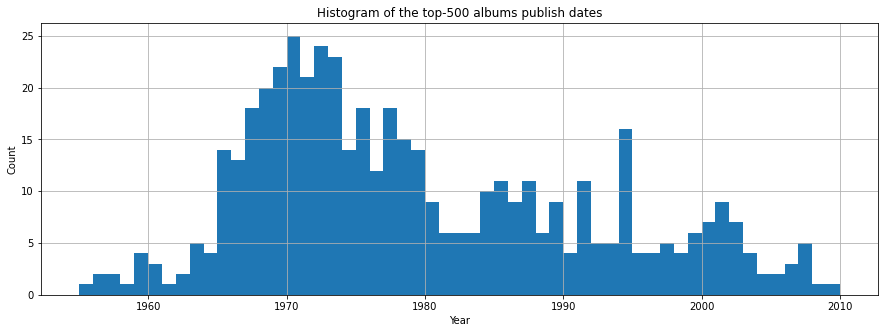

In [3]:
bins=np.arange(min(top500["year"]),max(top500["year"]))
plt.figure(figsize=(15,5))
plt.hist(top500["year"],bins=bins)
plt.title("Histogram of the top-500 albums publish dates")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [4]:
spliting = lambda x: x.replace("'","").replace("[","").replace("]","").replace(" ","").replace("&C","C").split(",")
top500["genre"]=top500["genre"].apply(spliting)
top500["subgenre"]=top500["subgenre"].apply(spliting)

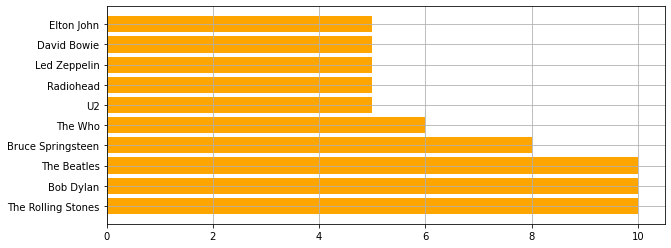

In [49]:
top_artist = top500["artist"].value_counts()
plt.figure(figsize=(10,4))
plt.grid(True)
plt.barh(top_artist[top_artist.values>4].index,
         top_artist[top_artist.values>4].values, 
         color="orange")
plt.show()

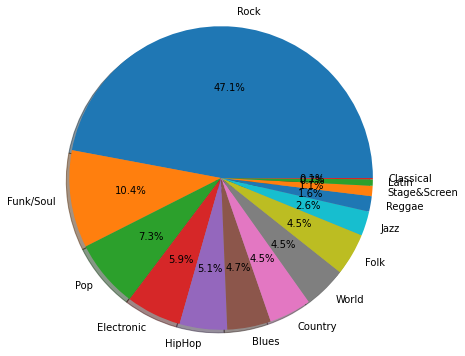

In [23]:
genre = word_count(top500["genre"])

explode = np.zeros(len(genre))
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(genre.values/sum(genre), explode=explode, 
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1.axis('equal')  
plt.show()

<ipython-input-25-6759325b9d73>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[1].pie(genre.values/sum(genre),


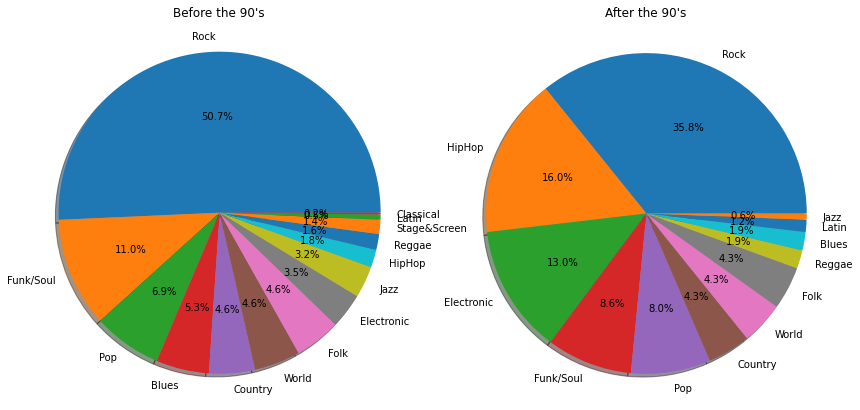

In [25]:
fig1, ax1 = plt.subplots(1,2,figsize=(14,7))
#Computing before 1990
genre = word_count(top500[top500["year"] < 1990]["genre"])
ax1[0].pie(genre.values/sum(genre),
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1[0].axis('equal') 
ax1[0].set_title("Before the 90's")
#Computing after 1990
genre = word_count(top500[top500["year"] > 1990]["genre"])
ax1[1].pie(genre.values/sum(genre),  
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1[1].axis('equal') 
ax1[1].set_title("After the 90's")
#Show plot
plt.show()

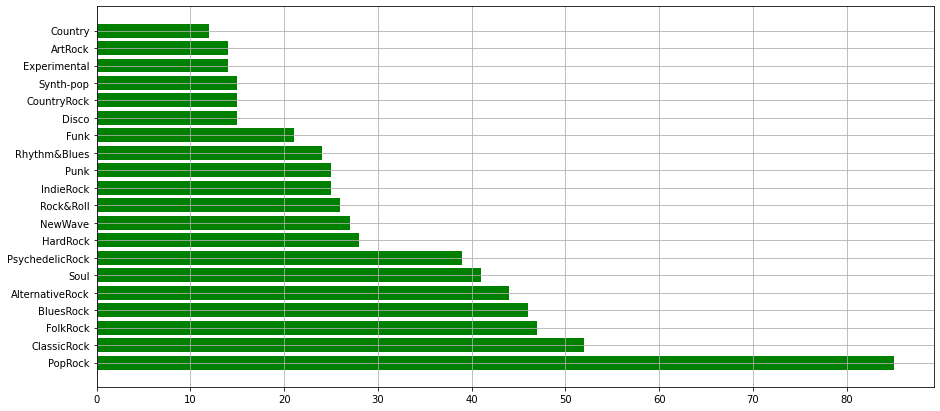

In [7]:
subgenre=word_count(top500["subgenre"])

plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel("Position")
plt.barh(subgenre[subgenre.index != "None"][:20].index,
         subgenre[subgenre.index != "None"][:20].values,
         color="green")
plt.show()

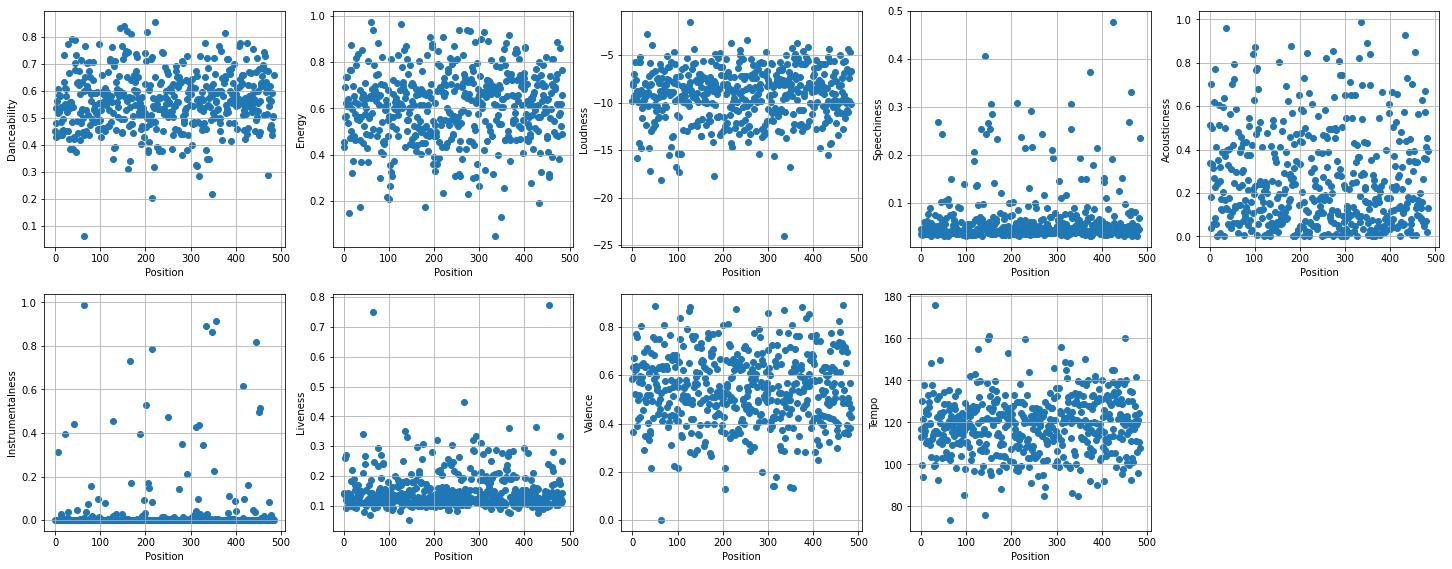

In [8]:
features = ['danceability', 'energy',  'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(25,20))
for i in range(len(features)):
    plt.subplot( len(features)//2,len(features)//2+1, i+1)
    plt.ylabel(features[i].capitalize())
    plt.xlabel("Position")
    plt.grid(True)
    plt.scatter( top500.index, top500[features[i]] )
plt.show()

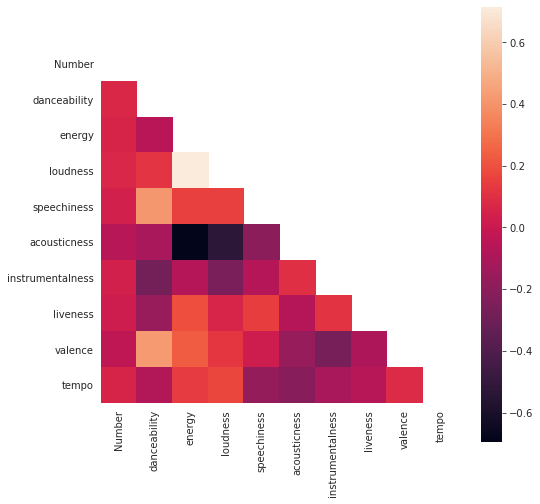

In [9]:
features = ['Number','danceability', 'energy',  'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
#Obtaining the correlation matrix
cor_matrix = top500[features].corr(method="pearson")
#Creating a mask to not to plot the main diagonal and repeated coeficients.
#This is, to plot only "a triangle" of the matrix 
mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True
#Plot the matrix using a heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(cor_matrix, mask=mask, square=True)
plt.show()

In [10]:
print("Number of albums with Wikipedia reads info: ",len(top500[top500["wiki_views_album"] > 0]))
print("Number of artists with Wikipedia reads info: ",len(top500[top500["wiki_views_artist"] > 0]))

Number of albums with Wikipedia reads info:  370
Number of artists with Wikipedia reads info:  462


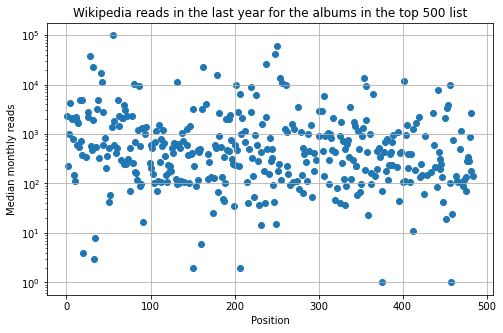

In [56]:

wiki_album=top500[top500["wiki_views_album"] > 0]["wiki_views_album"]

plt.figure(figsize=(8,5))
plt.title("Wikipedia reads in the last year for the albums in the top 500 list")
plt.grid(True)
plt.yscale("log")
plt.ylabel("Median monthly reads")
plt.xlabel("Position")
plt.scatter( wiki_album.index, wiki_album )
plt.show()

In [50]:
wiki_artist={artist:top500[top500["artist"]==artist]["wiki_views_artist"].mean()
            for artist in top_artist[top_artist.values>4].index}

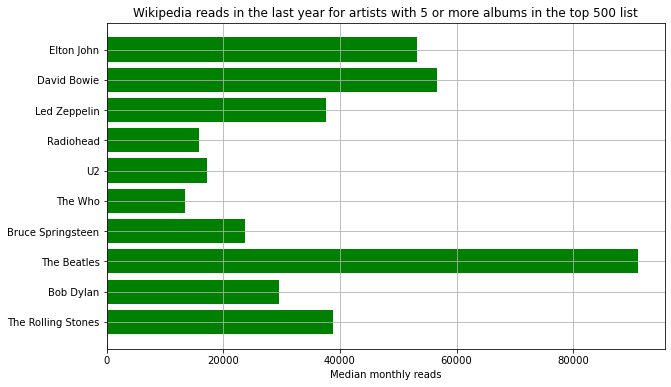

In [55]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Wikipedia reads in the last year for artists with 5 or more albums in the top 500 list")
plt.xlabel("Median monthly reads")
plt.barh(list(wiki_artist.keys()),list(wiki_artist.values()),
         color="green")
plt.show()